In [3]:
%matplotlib inline

In [4]:
mpl.rcParams["figure.figsize"]=(10,10)

In [2]:
%load_ext blackcellmagic

# Data input

In [21]:
geoid_lat_lon=[(1, 30, 40), (2, 20, 20)]
scale=4

In [32]:
def geomap(geoid_lat_lon, scale):
    geoid_gridid = {}
    scaler = GeoGridScaler(scale)
    for geoid, lat, lon in geoid_lat_lon:
        x, y = scaler.to_grid(lat, lon)
        geo_point = Point(xy=(x, y))
        grid_distr = geo_point.grid_shares()
        geoid_gridid[geoid] = {point: share for share, point in grid_distr}

    gridid_lat_lon = {}
    distinct_grid_points = set(
        grid_point
        for grid_distr in geoid_gridid.values()
        for grid_point in grid_distr.keys()
    )
    for grid_point in distinct_grid_points:
        gridid_lat_lon[grid_point] = scaler.to_geo(*grid_point.to_cart())

    return geoid_gridid, gridid_lat_lon


geoid_gridid, gridid_lat_lon = geomap(geoid_lat_lon, scale)


# Data output

In [31]:
import json

geo_distr_table = pd.DataFrame(
    [
        {
            "geo_id": geo_id,
            "distr": json.dumps(
                {grid_point.id(): share for grid_point, share in distr.items() if share != 0}
            ),
        }
        for geo_id, distr in geoid_gridid.items()
    ]
)
#display(geo_distr_table)

gridid_table = pd.DataFrame(
    [
        {"grid_id": grid_point.id(), "lat": geo_pos[0], "lon": geo_pos[1]}
        for grid_point, geo_pos in gridid_lat_lon.items()
    ]
)
#display(gridid_table)

#geo_distr_table.to_csv("geo_distr_table.csv", index=None)
#gridid_table.to_csv("gridid_table.csv", index=None)


,distr,geo_id
0,"{""8,4"": 0.250000000000002, ""8,3"": 0.2499999999...",1
1,"{""6,1"": 0.0, ""5,2"": 0.56898840674687, ""5,1"": 0...",2


,grid_id,lat,lon
0,"5,2",20.0,22.118520
1,"5,1",20.0,17.203293
2,"8,4",32.0,43.571134
3,"8,3",32.0,38.124742
4,"6,1",24.0,20.223634
5,"7,4",28.0,39.233377


# Other

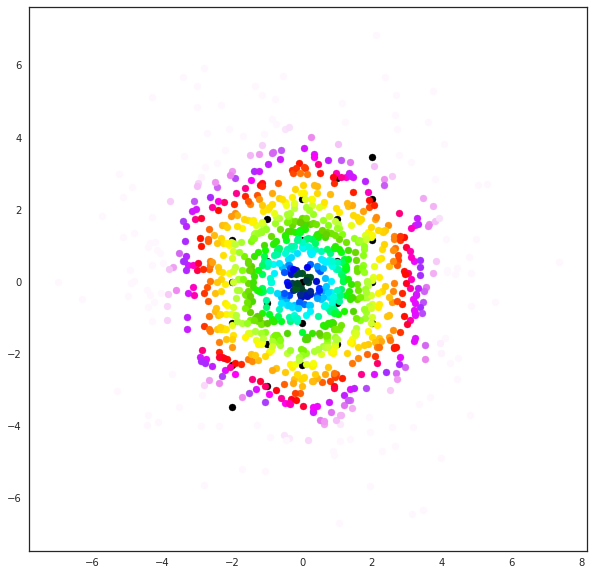

In [69]:
for t in product(range(-2, 3), repeat=dim-1):
    k=-sum(t)
    plt.scatter(*Point(coefs=t+(k,)).to_cart(), color="black")
    
for _ in range(1000):
    x,y=2*np.random.randn(2)
    dist=Point.zero().dist_to(Point(xy=(x,y)))
    plt.scatter(x,y,color=plt.cm.gist_ncar(dist/4))
#plt.axes("equal")

In [54]:
sum(Point(xy=(1.34,1.4)).dist_to(Point(coefs=p)) for p in ((1,0,-1), (0,0,0), (0,1,-1)))

4.104871130596429

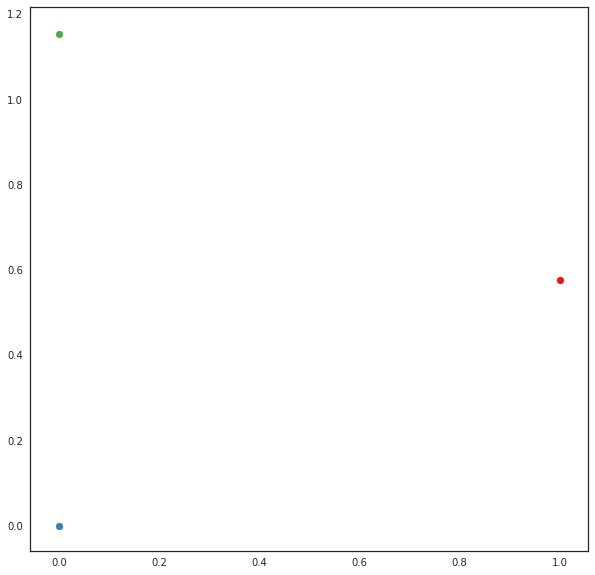

In [79]:
for p in ((1,0,-1), (0,0,0), (0,1,-1)):
    plt.scatter(*Point(coefs=p).to_cart())

0.4584014022150602 [16.         -6.92820323]
0.11392552670144507 [16.         -8.08290377]
0.4276730710834947 [15.        -7.5055535]


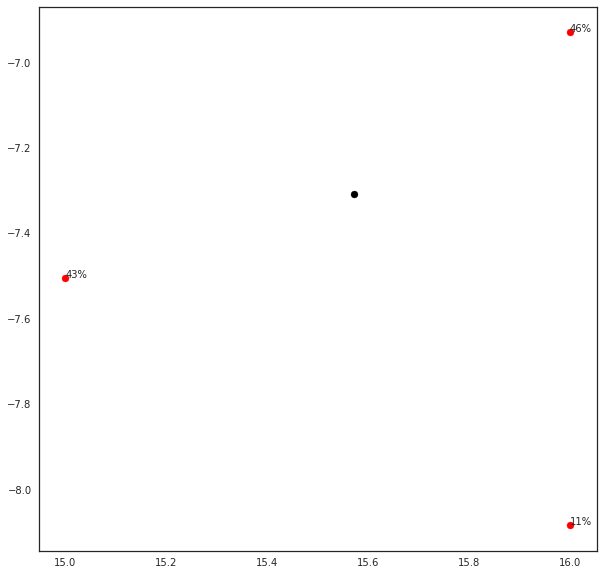

In [74]:
p=Point(xy=np.random.randn(2)*10)
plt.scatter(*p.to_cart(),color="black")

for share, pt in p.grid_shares():
    print(share, pt.to_cart())
    x,y=pt.to_cart()
    plt.text(float(x), float(y), f"{share:.0%}")
    plt.scatter(x,y,color="red")

In [48]:
Point(xy=(0.1,0.2)).grid_shares()

[3⌀
  (2⌀
    0.09999999999999987
    P(1, 0, -1) )
  (2⌀
    0.12320508075688785
    P(0, 1, -1) )
  (2⌀
    0.7767949192431123
    P(0, 0, 0) ) ]

In [ ]:
allow neg distance so that far sum still constant?